In [1]:
from unittest import TestCase
import unittest

from dowker import SimplexTree, Sink
import matplotlib
import matplotlib.pyplot as plt
import gudhi

### Basic usage

/home/jongkook90/.pyenv/versions/3.11.4/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


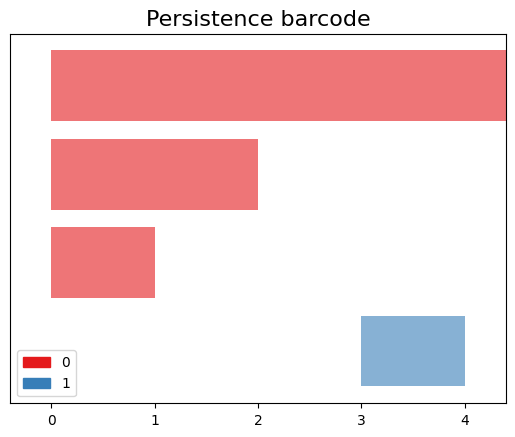

In [2]:
st = SimplexTree()
st.add_edge(a=1,b=2,w=1)
st.add_edge(a=2,b=3,w=2)
st.add_edge(a=3,b=1,w=3)
st.add_edge(a=2,b=1,w=4)
st.expand(max_dim=2)
diag = st.gudhi.persistence(min_persistence=0)
gudhi.plot_persistence_barcode(diag)
plt.show()

### Example 1

Chowdhury, Samir, and Facundo Mémoli. "Persistent homology of directed networks." 2016 50th Asilomar Conference on Signals, Systems and Computers. IEEE, 2016.

https://research.math.osu.edu/networks/pubs/dowker-asilo.pdf

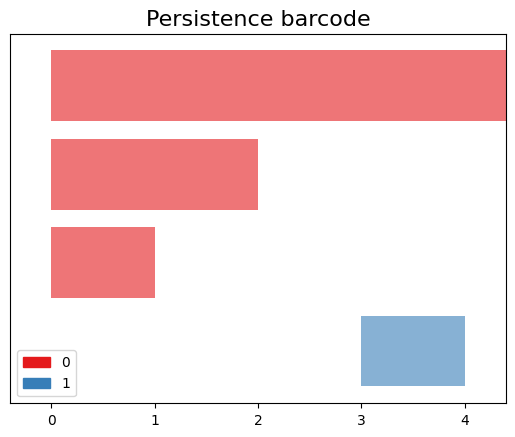

In [14]:
class ExampleOneTestCase(TestCase):

    def setUp(self):
        self.ph_x = sorted([(0, (0.0, float("inf"))), (0, (0.0, 2.0)), (0, (0.0, 1.0))])
        self.ph_y = sorted([(1, (3.0, 4.0)), (0, (0.0, float("inf"))), (0, (0.0, 2.0)), (0, (0.0, 1.0))])

    def build_x(self):
        # Figure 2, graph X
        st = SimplexTree()
        st.add_edge(a=1,b=3,w=4) # Equivalent to : st.update(Sink(center=1, simplex={1,3}, delta=4))
        st.add_edge(3,1,2)
        st.add_edge(3,2,3)
        st.add_edge(2,3,5)
        st.add_edge(2,1,1)
        st.add_edge(1,2,6)
        return st

    def build_y(self):
        # Figure 2, graph Y
        st = SimplexTree()
        st.add_edge(a=1,b=3,w=2) # Equivalent to : st.update(Sink(center=1, simplex={1,3}, delta=4))
        st.add_edge(3,1,4)
        st.add_edge(3,2,3)
        st.add_edge(2,3,5)
        st.add_edge(2,1,1)
        st.add_edge(1,2,6)
        return st
    
    def compare_list(self, a,b):
        self.assertTrue(len(a) == len(b), msg=f"size does not match:\nResult:{a}\nValid:{b}")
        self.assertTrue(all(x==y for x,y in zip(sorted(a), sorted(b))), msg=f"value does not match:\nResult:{a}\nValid:{b}")

    def test_ph_x(self):
        st = self.build_x()
        st.expand(max_dim=2)
        st = st.get_gudhi_simplex_tree()
        diag = st.persistence(min_persistence=0)
        self.compare_list(diag, self.ph_x)

    def test_ph_y(self):
        st = self.build_y()
        st.expand(max_dim=2)
        st = st.get_gudhi_simplex_tree()
        diag = st.persistence(min_persistence=0)
        self.compare_list(diag, self.ph_y)

    def chart(self):
        st_y = self.build_y()
        st_y.expand(max_dim=2)
        diag = st_y.gudhi.persistence(min_persistence=0)
        gudhi.plot_persistence_barcode(diag)
        plt.show()

e = ExampleOneTestCase()
e.setUp()
e.chart()

### Example 2

PersNet MATLAB package tutorial

https://github.com/fmemoli/PersNet/blob/master/persnet-tutorial.pdf

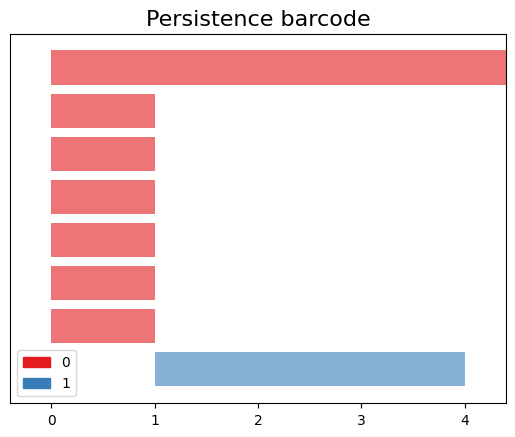

In [23]:
class ExampleTwoTestCase(TestCase):

    def setUp(self):
        # Figure 4
        self.data = [
            [0, 1, 2, 3, 4, 5, 6],
            [6, 0, 1, 2, 3, 4, 5],
            [5, 6, 0, 1, 2, 3, 4],
            [4, 5, 6, 0, 1, 2, 3],
            [3, 4, 5, 6, 0, 1, 2],
            [2, 3, 4, 5, 6, 0, 1],
            [1, 2, 3, 4, 5, 6, 0]]
        self.ph = [(1, (1.0, 4.0)), (0, (0.0, float("inf"))), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]
    
    def build(self):
        st = SimplexTree()
        st.add_edge_from_array(self.data, nrow=7, ncol=7)
        return st

    def compare_list(self, a,b):
        self.assertTrue(len(a) == len(b), msg=f"size does not match:\nResult:{a}\nValid:{b}")
        self.assertTrue(all(x==y for x,y in zip(sorted(a), sorted(b))), msg=f"value does not match:\nResult:{a}\nValid:{b}")

    def test_ph(self):
        st = self.build()
        st.expand(max_dim=2)
        diag = st.gudhi.persistence(min_persistence=0)
        self.compare_list(diag, self.ph)

    def chart(self):
        st = self.build()
        st.expand(max_dim=2)
        diag = st.gudhi.persistence(min_persistence=0)
        gudhi.plot_persistence_barcode(diag)
        plt.show()

e = ExampleTwoTestCase()
e.setUp()
e.chart()

In [24]:

if __name__ == '__main__':
    # unittest.main()
    unittest.main(argv=[''], verbosity=2, exit=False)


test_ph_x (__main__.ExampleOneTestCase.test_ph_x) ... ok
test_ph_y (__main__.ExampleOneTestCase.test_ph_y) ... ok
test_ph (__main__.ExampleTwoTestCase.test_ph) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.012s

OK
